# Large-sample confidence intervals: difference between two proportions

**date**
: 2021-04-16

**aim:** Calculate a **100(1-a)%** approximate confidence interval for the difference between two proportions.

**reference:** M248 Computer book B, Activity 20

**data**: `sewer.csv`

**description**: Occupational risk to sewerage workers of hepatitis A infection though contact with raw sewage.
Relevant fields for this example:

- **Immunity:** `0=no immunity, 1=immunity`

- **Children** `1=no children, 2=children`

**module:** `statsmodels.stats.proportion.confint_proportions_2indep`

## Setup

In [2]:
from setup import load
from statsmodels.stats.proportion import confint_proportions_2indep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import the data
sewer = load.sewer()

In [4]:
# replace entries with meaningful input
sewer["Immunity"].replace({0: "No", 1: "Yes"}, inplace=True)
sewer["Children"].replace({1: "No", 2: "Yes"}, inplace=True)

## Describe

### Preview the data

In [5]:
sewer.head()

,Immunity,Age,Exposure,Children
0,No,41.43,2,Yes
1,No,51.79,2,Yes
2,Yes,41.12,2,Yes
3,Yes,29.95,3,Yes
4,Yes,40.78,2,Yes


### Visualise the data

In [9]:
# group the data, and count
gsewer = sewer.groupby(["Immunity", "Children"]).count()
gsewer.reset_index(inplace=True)
gsewer.rename(columns={"Age": "Freq"}, inplace=True)

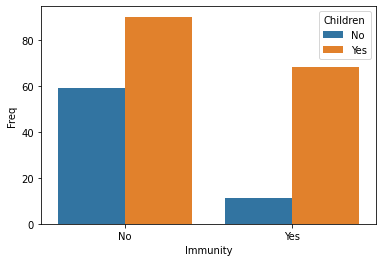

In [10]:
# plot the data
ax = sns.barplot(data=gsewer, x="Immunity", y="Freq", hue="Children")
plt.show()

## Results

Construct a contingenct table showing **Children** against **Immunity** using `pd.crosstab()`.

In [11]:
pd.crosstab(index=sewer["Children"], columns=sewer["Immunity"], margins=True)

Immunity,No,Yes,All
Children,,,
No,59,11,70
Yes,90,68,158
All,149,79,228


Calculate a 95% confidence interval for the difference in the proportions of those infected among sewerage workers with no children and the proportion infected among sewerage workers with children.

In [7]:
confint_proportions_2indep(
    count1=68,  # has children, has immunity
    nobs1=158,  # has children
    count2=11,  # no children, has immunity
    nobs2=70,   # no children
    method="wald"
)

(0.1582197356059404, 0.38825404377923145)

Note the default actual argument for formal agument `method=newcomb`, but this does not return the result expected in **M248.**